<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/blur_deblur_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

import os
from tqdm import tqdm

from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD

#bluring

based on https://www.geeksforgeeks.org/opencv-motion-blur-in-python/

In [ ]:
random.randint(1,30)

17

In [ ]:
def bluring(img,random_kernel_size=False,max_kernel_size=30,kernel_size=10,show=False,return_=True):
    if random_kernel_size:
        kernel_size = random.randint(1,max(4,max_kernel_size))

    kernel_v = np.zeros((kernel_size, kernel_size))
    kernel_h = np.copy(kernel_v)

    kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
    kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

    kernel_v /= kernel_size
    kernel_h /= kernel_size

    vertical_mb = cv2.filter2D(img, -1, kernel_v)
    horizonal_mb = cv2.filter2D(img, -1, kernel_h)
    total = cv2.filter2D(vertical_mb, -1, kernel_h)

    # cv2.imwrite('car_vertical.jpg', vertical_mb)
    # cv2.imwrite('car_horizontal.jpg', horizonal_mb)
    if show:
        print(kernel_size)
        plt.imshow(vertical_mb)
        plt.show()
        plt.imshow(vertical_mb)
        plt.show()
        plt.imshow(vertical_mb)
        plt.show()

    if return_:
        return vertical_mb,vertical_mb,vertical_mb

In [ ]:
# img = cv2.imread('positivity.png')

In [ ]:
# plt.imshow(img)

In [ ]:
# a,b,c = bluring(img,True,show=True)

In [ ]:
# a,b,c = bluring(img,True,max_kernel_size=15,show=True)

#debluring phase

## simple type:

###commented simple sample

In [ ]:
#de bluring based method:

In [ ]:
# import cv2
# import numpy as np

# image = cv2.imread('1.jpg')
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv2.filter2D(image, -1, sharpen_kernel)

# cv2.imshow('sharpen', sharpen)
# cv2.waitKey()

### read data:

In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

In [ ]:
!mkdir binaryimageclassificationdatasetbasedongender

In [ ]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!chmod 600 kaggle.json

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 97% 261M/269M [00:01<00:00, 210MB/s]
100% 269M/269M [00:01<00:00, 201MB/s]


In [ ]:
!pwd
# !ls -l

/content/drive/MyDrive


In [ ]:
%mv gender-classification-dataset.zip binaryimageclassificationdatasetbasedongender/

In [ ]:
%cd binaryimageclassificationdatasetbasedongender
# !ls

/content/drive/MyDrive/binaryimageclassificationdatasetbasedongender


In [ ]:
!unzip gender-classification-dataset.zip

In [ ]:
%cd Validation

/content/drive/MyDrive/binaryimageclassificationdatasetbasedongender2/Validation


In [ ]:
!ls

female	male


In [ ]:
malelist = []
femalelist = []

In [ ]:
%cd ..

/content/drive/MyDrive/binaryimageclassificationdatasetbasedongender2


In [ ]:
%pwd

'/content/drive/MyDrive/binaryimageclassificationdatasetbasedongender2'

In [ ]:
import os

In [ ]:
malepath = "/content/binaryimageclassificationdatasetbasedongender2/Validation/male"
malelist = os.listdir(malepath)

femalepath = "/content/binaryimageclassificationdatasetbasedongender2/Validation/female"
femalelist = os.listdir(femalepath)

FileNotFoundError: ignored

In [ ]:
len(malelist),len(femalelist)

NameError: ignored

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(malelist))):
    malelist[i] = malepath+"/"+malelist[i]

for i in tqdm(range(len(femalelist))):
    femalelist[i] = femalepath+"/"+femalelist[i]


100%|██████████| 23243/23243 [00:00<00:00, 716609.02it/s]


In [ ]:
# fsample = femalepath+"/"+femalelist[0]
# msample = malepath+"/"+malelist[0]
# fsample,msample

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

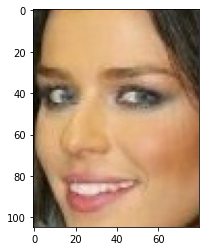

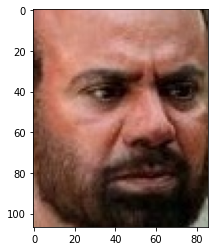

In [ ]:
fim = cv2.imread(femalelist[0])
mim = cv2.imread(malelist[0])
fim = cv2.cvtColor(fim, cv2.COLOR_BGR2RGB)
mim = cv2.cvtColor(mim, cv2.COLOR_BGR2RGB)
plt.imshow(fim)
plt.show()
plt.imshow(mim)
plt.show()

### svd example

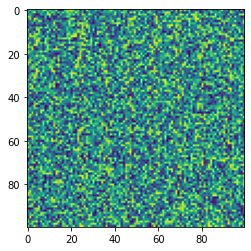

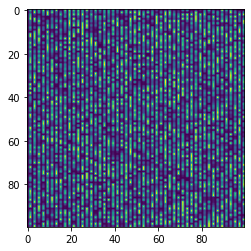

[0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070334
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = np.random.rand(100, 100)
plt.imshow(X_dense);plt.show()
X_dense[:, 2 * np.arange(50)] = 0
plt.imshow(X_dense);plt.show()
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

### next phase

In [ ]:
# f = np.random.rand(100, 100)
f = np.ones((100,100))*0.5
f[20:40,20:]=0
f[40:50,20:]=1

In [ ]:
kernel = np.ones((3,3))/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
g = cv2.filter2D(f,-1, kernel)

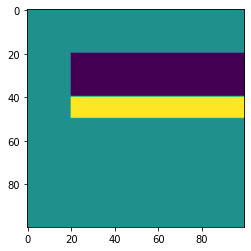

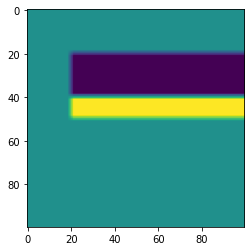

In [ ]:
plt.imshow(f);plt.show()
plt.imshow(g);plt.show()

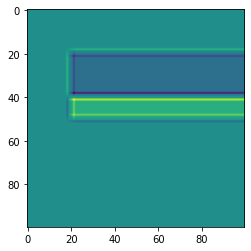

In [ ]:
import cv2
import numpy as np

sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(g, -1, sharpen_kernel)

plt.imshow(sharpen);plt.show()

In [ ]:
from scipy.ndimage import convolve

blurred_image = g
kernel = sharpen_kernel
learning_rate = 0.004
maxit = 10000

def loss(image):
    return 0.5 * np.sum((convolve(image, kernel) - blurred_image)**2)

def gradient(image):
    return convolve(convolve(image, kernel) - blurred_image, kernel.T)

deblurred = blurred_image.copy()
for _ in range(maxit):
    deblurred -= learning_rate*gradient(f)

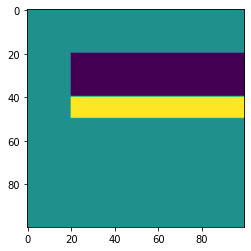

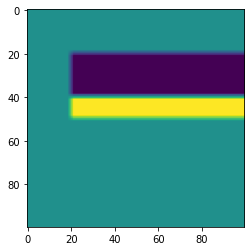

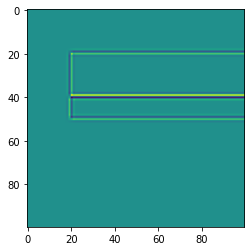

In [ ]:
plt.imshow(f);plt.show()
plt.imshow(g);plt.show()
plt.imshow(deblurred);plt.show()

###tsvd

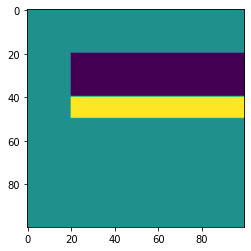

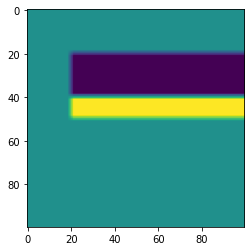

[5.04276902e+01 1.00338271e+01 1.17367974e-15 7.83693279e-16
 4.73604063e-30]


In [ ]:
from sklearn.decomposition import TruncatedSVD

plt.imshow(f);plt.show()
plt.imshow(g);plt.show()

tsvd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
tsvd.fit(g)
print(tsvd.singular_values_)

In [ ]:
from scipy.linalg import svd
U, s, VT = svd(g)
print(U.shape,s.shape,VT.shape)

(100, 100) (100,) (100, 100)


In [ ]:
fhat = np.zeros(g.shape)
V = VT.transpose()
# UT = U.transpose()
for i in range(len(s)):
    temp1 = (1/s[i])*(np.dot(V[i].reshape((-1,1)),U[i].reshape((1,-1))))
    fhat+=temp1

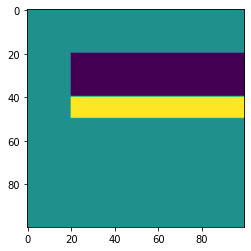

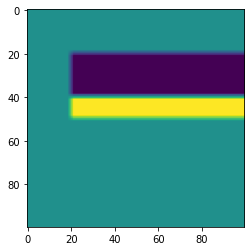

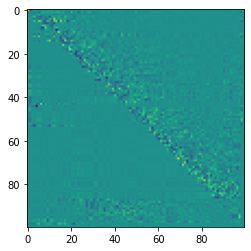

In [ ]:
plt.imshow(f);plt.show()
plt.imshow(g);plt.show()
plt.imshow(fhat);plt.show()